<a href="https://colab.research.google.com/github/BADALRAJ12345/JavaScriptQuotes.github.io/blob/main/Face_RecognitionAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
!pip install cmake dlib face_recognition numpy opencv-python

In [4]:
from google.colab import drive 
drive.mount('/gdrive/')

Mounted at /gdrive/


In [6]:
%cd /gdrive/My Drive/Face_detection

/gdrive/My Drive/Face_detection


In [7]:
%ls

Badal.jpg   Faces/       shikhaar1.jpg      Shraddha.jpg
David.jpg   Jadeja1.jpg  ShikharDhawan.jpg  virat10.jpg
dhoni1.jpg  Prasuk.jpg   shikhardhaw.jpg


In [8]:
import face_recognition as fr
import cv2
import os, shutil
import numpy as np
from google.colab.patches import cv2_imshow

In [9]:
def get_encoded_faces():
  encoded ={}
  for dirpath,dname,fname in os.walk("./Faces"):
    for f in fname:
      if f.endswith(".jpg") or f.endswith(".png"):
        face = fr.load_image_file("Faces/" + f)
        encoding = fr.face_encodings(face)[0]
        encoded[f.split(".")[0]] = encoding

  return encoded          




In [10]:
x = get_encoded_faces()

In [ ]:
x

{'Badal Raj': array([-0.11179711,  0.07016995,  0.05747408, -0.03788459, -0.00128667,
        -0.02583078, -0.0137914 , -0.03187367,  0.13944355, -0.09731652,
         0.19622722,  0.00623641, -0.17074659, -0.17437595,  0.0558119 ,
         0.1153744 , -0.13275331, -0.16490819, -0.00147964, -0.10154302,
        -0.01887222,  0.07571779, -0.00369438,  0.02267984, -0.06853095,
        -0.37238654, -0.10359649, -0.21314076,  0.0137955 , -0.04781121,
         0.0198898 ,  0.01674189, -0.18131246, -0.00176734,  0.03239923,
         0.11592682, -0.01069033,  0.02169829,  0.17643003,  0.02171506,
        -0.11265904, -0.05914122,  0.04178522,  0.3059721 ,  0.12112075,
         0.03783953, -0.03950648,  0.02309777,  0.11119321, -0.19646999,
         0.16226164,  0.09335949,  0.134214  ,  0.05711921,  0.13644072,
        -0.15134421,  0.01838242, -0.01364062, -0.23466896,  0.01977304,
        -0.01471177, -0.01790632, -0.09748475, -0.03230374,  0.24940564,
         0.16511965, -0.05787715, -0.1

In [11]:
def classify_face(im):
  faces = get_encoded_faces()
  faces_encoded = list(faces.values())
  known_face_names = list(faces.keys())

  img = cv2.imread(im)
  face_locations = fr.face_locations(img)
  unknown_face_encodings = fr.face_encodings(img,face_locations)

  face_names=[]
  for face_encoding in unknown_face_encodings:
    name ="Unknown"
    matches = fr.compare_faces(faces_encoded,face_encoding)

    face_distances = fr.face_distance(faces_encoded,face_encoding)
    best_match_index = np.argmin(face_distances)
    if matches[best_match_index]:
      name = known_face_names[best_match_index]

      face_names.append(name)

      for(top, right, bottom, left),name in zip(face_locations, face_names):
        cv2.rectangle(img,(left-20,top-20),(right+20,bottom+20),(255,0,0),2)
        cv2.rectangle(img,(left-20,bottom-15),(right+20,bottom+20),(255,0,0),cv2.FILLED)
        cv2.putText(img,name,(left-20,bottom+15),cv2.FONT_HERSHEY_DUPLEX,0.5,(255,255,255),1)

      while True:
        cv2_imshow(img)
        return face_names  


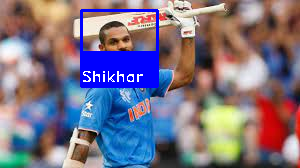

['Shikhar']

In [ ]:
classify_face("shikhaar1.jpg")

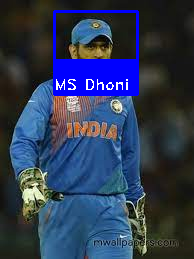

['MS Dhoni']

In [ ]:
classify_face("dhoni1.jpg")

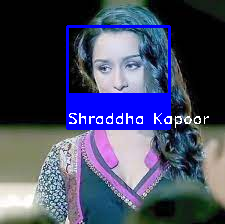

['Shraddha Kapoor']

In [ ]:
classify_face("Shraddha.jpg")

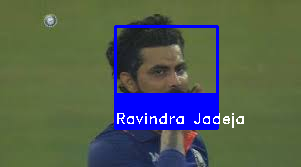

['Ravindra Jadeja']

In [ ]:
classify_face("Jadeja1.jpg")

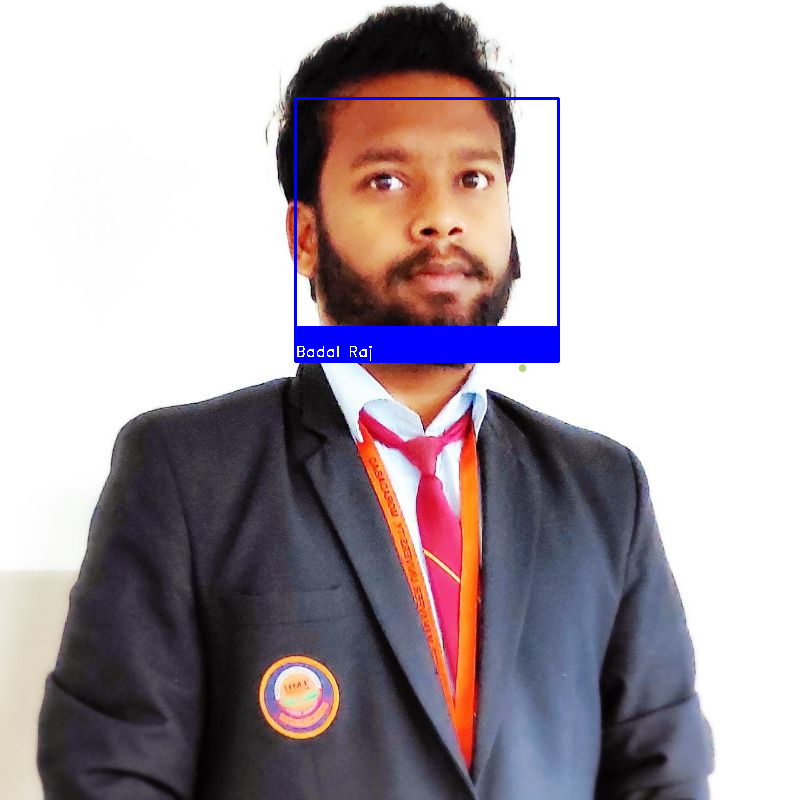

['Badal Raj']

In [ ]:
classify_face("Badal.jpg")

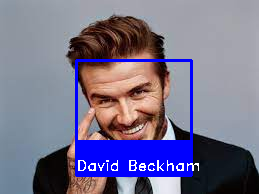

['David Beckham']

In [12]:
classify_face("David.jpg")